In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#Change to your npy dir path
print(os.listdir("C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/lung_datasets(full301cases)/"))

['0001_NI000_slice000.npy', '0001_NI000_slice001.npy', '0001_NI000_slice002.npy', '0001_NI000_slice003.npy', '0001_NI000_slice004.npy', '0001_NI000_slice005.npy', '0001_NI000_slice006.npy', '0001_NI000_slice007.npy', '0002_NI000_slice000.npy', '0002_NI000_slice001.npy', '0002_NI000_slice002.npy', '0002_NI000_slice003.npy', '0002_NI000_slice004.npy', '0002_NI000_slice005.npy', '0002_NI000_slice006.npy', '0002_NI000_slice007.npy', '0002_NI000_slice008.npy', '0002_NI000_slice009.npy', '0002_NI000_slice010.npy', '0002_NI000_slice011.npy', '0002_NI000_slice012.npy', '0002_NI000_slice013.npy', '0002_NI000_slice014.npy', '0002_NI000_slice015.npy', '0002_NI000_slice016.npy', '0002_NI000_slice017.npy', '0002_NI000_slice018.npy', '0002_NI000_slice019.npy', '0002_NI000_slice020.npy', '0002_NI000_slice021.npy', '0002_NI000_slice022.npy', '0002_NI000_slice023.npy', '0002_NI000_slice024.npy', '0002_NI000_slice025.npy', '0002_NI000_slice026.npy', '0002_NI000_slice027.npy', '0003_NI000_slice000.npy', 

In [2]:
import tensorflow
import tensorflow.keras as K
from tensorflow.keras.layers import Conv2D
import tqdm
import os
import cv2
import random
import numpy as np
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [3]:
import glob
num_classes=3
#load the image data
#Change to your npy dir path
path = 'C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/lung_datasets(full301cases)/'

trainImages = []
for i in os.listdir(path):
    data = np.load(path+i,allow_pickle=True) 
    data = np.resize(data,(224,224,3))
    trainImages.append(data)
        
trainImages=np.asarray(trainImages)
trainImages.shape
#trainImages.reshape(-1,224,224,3)

(7374, 224, 224, 3)

In [4]:
import pandas as pd
import numpy as np

#Change to your csv dir path
path= "C:/Users/Chai Chee Chiet/Desktop/fyp python/LIDCcases/meta_info(full301cases).csv"
df = pd.read_csv(path)

In [5]:
label_data=pd.Series(df['is_cancer'])
label_data

0            TRUE
1            TRUE
2            TRUE
3            TRUE
4            TRUE
          ...    
7369    Ambiguous
7370    Ambiguous
7371    Ambiguous
7372    Ambiguous
7373    Ambiguous
Name: is_cancer, Length: 7374, dtype: object

In [6]:
lb=LabelBinarizer()
label_data=lb.fit_transform(label_data)

In [7]:
#Split the train dataset
X_train,X_test,Y_train,Y_test=train_test_split(trainImages,label_data,test_size=0.2,random_state=42)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(5899, 224, 224, 3) (1475, 224, 224, 3)
(5899, 3) (1475, 3)


In [8]:
from tensorflow.keras.applications.mobilenet import MobileNet

#Loading mobilenet model
size = K.Input(shape=(224,224,3))
mobilenet_model = MobileNet(weights="imagenet", include_top=False, input_tensor=size)
mobilenet_model.summary()

17227776/17225924 [==============================] - 1s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________

In [9]:
mobilenet_m = K.models.Sequential()
mobilenet_m.add(mobilenet_model)
mobilenet_m.add(K.layers.Flatten())
mobilenet_m.add(K.layers.Dense(64, activation='relu'))
mobilenet_m.add(K.layers.Dense(3, activation='softmax'))

mobilenet_m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                3211328   
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 6,440,387
Trainable params: 6,418,499
Non-trainable params: 21,888
_________________________________________________________________


In [10]:
mobilenet_m.compile(optimizer=K.optimizers.Adam(learning_rate=0.0001), loss=K.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [11]:
mobilenet_m_history = mobilenet_m.fit(X_train, Y_train,batch_size=16, validation_split=0.2, verbose=1, epochs=30)

Epoch 1/30


c:\Users\PC\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\backend.py:4869: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


295/295 [==============================] - 40s 100ms/step - loss: 0.8593 - accuracy: 0.6116 - val_loss: 0.8251 - val_accuracy: 0.6186
Epoch 2/30
295/295 [==============================] - 24s 82ms/step - loss: 0.6350 - accuracy: 0.7188 - val_loss: 0.6831 - val_accuracy: 0.7076
Epoch 3/30
295/295 [==============================] - 24s 81ms/step - loss: 0.4966 - accuracy: 0.7953 - val_loss: 0.6147 - val_accuracy: 0.7186
Epoch 4/30
295/295 [==============================] - 24s 82ms/step - loss: 0.3627 - accuracy: 0.8642 - val_loss: 0.6193 - val_accuracy: 0.7686
Epoch 5/30
295/295 [==============================] - 25s 83ms/step - loss: 0.2360 - accuracy: 0.9231 - val_loss: 0.5773 - val_accuracy: 0.7975
Epoch 6/30
295/295 [==============================] - 24s 82ms/step - loss: 0.1675 - accuracy: 0.9489 - val_loss: 0.6041 - val_accuracy: 0.7924
Epoch 7/30
295/295 [==============================] - 24s 82ms/step - loss: 0.1083 - accuracy: 0.9701 - val_loss: 0.5143 - val_accuracy: 0.8068
Ep

In [12]:
mobilenet_m.save('pretrainedmobilenet.h5')

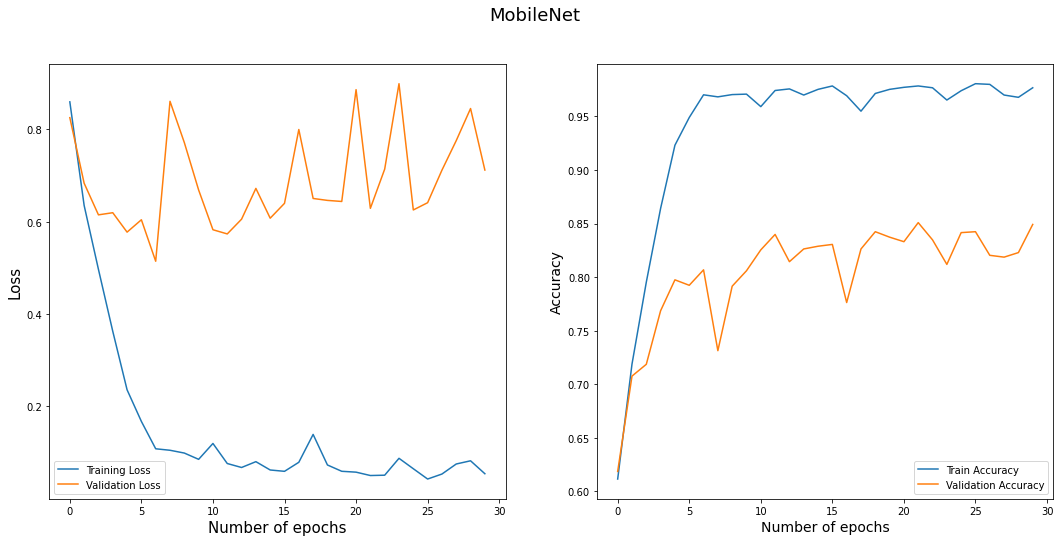

In [13]:
plt.figure(figsize=(18,8))

plt.suptitle('MobileNet', fontsize=18)

plt.subplot(1,2,1)
plt.plot(mobilenet_m_history.history['loss'], label='Training Loss')
plt.plot(mobilenet_m_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(mobilenet_m_history.history['accuracy'], label='Train Accuracy')
plt.plot(mobilenet_m_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [8]:
mobilenet_m=K.models.load_model('pretrainedmobilenet.h5')

In [9]:
test_loss, test_acc = mobilenet_m.evaluate(X_test,Y_test, verbose=2)

47/47 - 4s - loss: 0.7019 - accuracy: 0.8461


In [10]:
y_pred = mobilenet_m.predict(X_test)

In [11]:
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71       258
           1       0.89      0.93      0.91       874
           2       0.85      0.73      0.79       343

    accuracy                           0.85      1475
   macro avg       0.81      0.79      0.80      1475
weighted avg       0.85      0.85      0.84      1475



In [12]:
mobilenet_with301cases_cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(mobilenet_with301cases_cm)

[[186  53  19]
 [ 39 811  24]
 [ 41  51 251]]


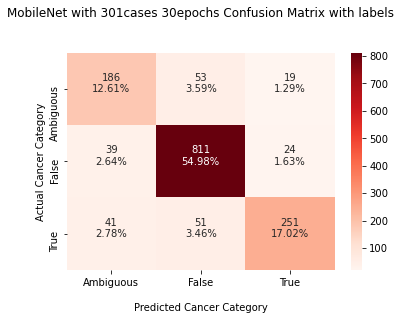

In [13]:
group_counts = ["{0:0.0f}".format(value) for value in
                mobilenet_with301cases_cm.flatten()]
                #change to cm
group_percentages = ["{0:.2%}".format(value) for value in
                     mobilenet_with301cases_cm.flatten()/np.sum(mobilenet_with301cases_cm)]
                     #change to cm                          #change to cm
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(mobilenet_with301cases_cm, annot=labels, fmt='', cmap='Reds') 
                 #change to cm
ax.set_title('MobileNet with 301cases 30epochs Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

<b>Xception</b>

In [19]:
from tensorflow.keras.applications.xception import Xception

#Loading Xception model
size = K.Input(shape=(224,224,3))
Xception_model = Xception(weights="imagenet", include_top=False, input_tensor=size)
Xception_model.summary()

83689472/83683744 [==============================] - 12s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
_________________________

In [20]:
Xception_m = K.models.Sequential()
Xception_m.add(Xception_model)
Xception_m.add(K.layers.Flatten())
Xception_m.add(K.layers.Dense(64, activation='relu'))
Xception_m.add(K.layers.Dropout(0.5))
Xception_m.add(K.layers.Dense(3, activation='softmax'))

Xception_m.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 7, 7, 2048)        20861480  
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                6422592   
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 195       
Total params: 27,284,267
Trainable params: 27,229,739
Non-trainable params: 54,528
_________________________________________________________________


In [21]:
Xception_m.compile(optimizer=K.optimizers.Adam(learning_rate=0.0001), loss=K.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [22]:
Xception_history = Xception_m.fit(X_train, Y_train,batch_size=16, validation_split=0.2, verbose=1, epochs=30)

Epoch 1/30


c:\Users\PC\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\backend.py:4869: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


295/295 [==============================] - 78s 252ms/step - loss: 0.8727 - accuracy: 0.6073 - val_loss: 0.7613 - val_accuracy: 0.6398
Epoch 2/30
295/295 [==============================] - 68s 231ms/step - loss: 0.6781 - accuracy: 0.7059 - val_loss: 0.6961 - val_accuracy: 0.7059
Epoch 3/30
295/295 [==============================] - 69s 233ms/step - loss: 0.5372 - accuracy: 0.7845 - val_loss: 0.5782 - val_accuracy: 0.7653
Epoch 4/30
295/295 [==============================] - 68s 232ms/step - loss: 0.3939 - accuracy: 0.8478 - val_loss: 0.6221 - val_accuracy: 0.7831
Epoch 5/30
295/295 [==============================] - 68s 231ms/step - loss: 0.2778 - accuracy: 0.9038 - val_loss: 0.8388 - val_accuracy: 0.7636
Epoch 6/30
295/295 [==============================] - 69s 233ms/step - loss: 0.2177 - accuracy: 0.9299 - val_loss: 0.6616 - val_accuracy: 0.8186
Epoch 7/30
295/295 [==============================] - 69s 234ms/step - loss: 0.1659 - accuracy: 0.9481 - val_loss: 0.5859 - val_accuracy: 0.8

In [23]:
Xception_m.save('pretrainedXception.h5')

c:\Users\PC\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


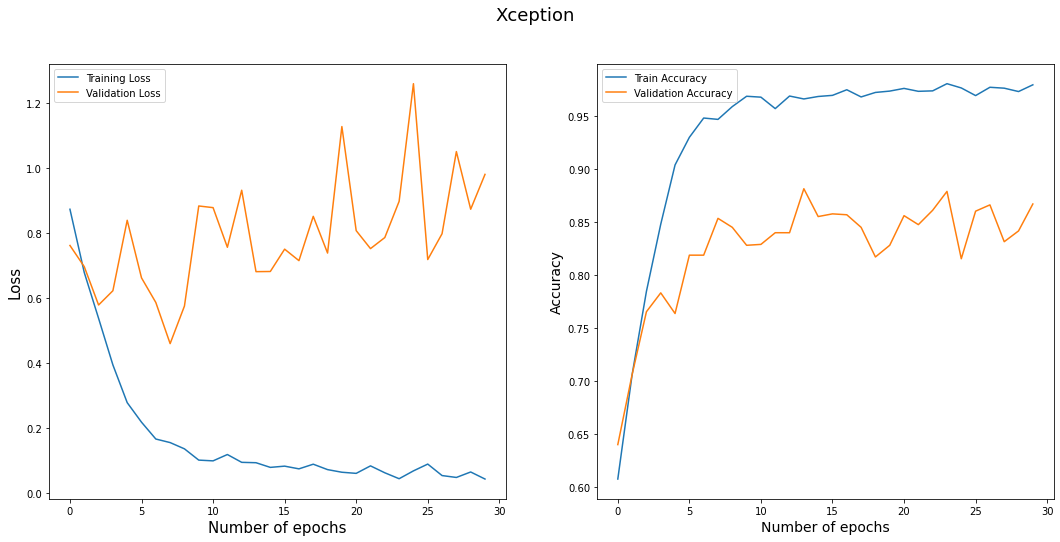

In [24]:
plt.figure(figsize=(18,8))

plt.suptitle('Xception', fontsize=18)

plt.subplot(1,2,1)
plt.plot(Xception_history.history['loss'], label='Training Loss')
plt.plot(Xception_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(Xception_history.history['accuracy'], label='Train Accuracy')
plt.plot(Xception_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

In [14]:
Xception_m=K.models.load_model('pretrainedXception.h5')

In [15]:
test_loss, test_acc = Xception_m.evaluate(X_test,Y_test, verbose=2)

47/47 - 14s - loss: 0.6861 - accuracy: 0.8644


In [16]:
y_pred = Xception_m.predict(X_test)

In [17]:
print(classification_report(np.argmax(Y_test,axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.57      0.68       258
           1       0.89      0.95      0.92       874
           2       0.81      0.86      0.83       343

    accuracy                           0.86      1475
   macro avg       0.85      0.79      0.81      1475
weighted avg       0.86      0.86      0.86      1475



In [18]:
Xception_cm = confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(Xception_cm)

[[147  68  43]
 [ 12 834  28]
 [ 13  36 294]]


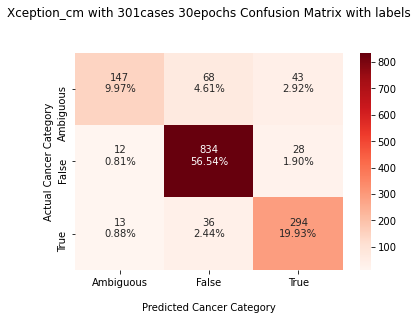

In [19]:
group_counts = ["{0:0.0f}".format(value) for value in
                Xception_cm.flatten()]
                #change to cm
group_percentages = ["{0:.2%}".format(value) for value in
                     Xception_cm.flatten()/np.sum(Xception_cm)]
                     #change to cm                          #change to cm
labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(3,3)

ax = sns.heatmap(Xception_cm, annot=labels, fmt='', cmap='Reds') 
                 #change to cm
ax.set_title('Xception_cm with 301cases 30epochs Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Cancer Category')
ax.set_ylabel('Actual Cancer Category');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Ambiguous','False', 'True'])
ax.yaxis.set_ticklabels(['Ambiguous','False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()